In [1]:
import pandas as pd
import numpy as np
import re
import time

In [2]:
df = pd.read_csv('../data/combined_labeled_df.csv')

In [3]:
df.head()

,user_id,tweet,state,likes,retweet_count,avg_polarity,label
0,8.436472e+06,"#Trump: As a student I used to hear for years,...",Oregon,2.0,1.0,0.461917,-1
1,4.741380e+07,You get a tie! And you get a tie! #Trump ‘s ra...,District of Columbia,4.0,3.0,0.000000,0
2,1.138416e+09,@CLady62 Her 15 minutes were over long time ag...,California,2.0,0.0,-0.323204,1
3,5.404769e+08,One of the single most effective remedies to e...,Pennsylvania,0.0,0.0,0.366371,-1
4,1.243315e+18,#Trump #PresidentTrump #Trump2020LandslideVict...,California,3.0,5.0,0.513350,-1


#### Apply Lower Case

In [4]:
df['tweet'] = df['tweet'].apply(lambda x: str(x).lower())
df.head()

,user_id,tweet,state,likes,retweet_count,avg_polarity,label
0,8.436472e+06,"#trump: as a student i used to hear for years,...",Oregon,2.0,1.0,0.461917,-1
1,4.741380e+07,you get a tie! and you get a tie! #trump ‘s ra...,District of Columbia,4.0,3.0,0.000000,0
2,1.138416e+09,@clady62 her 15 minutes were over long time ag...,California,2.0,0.0,-0.323204,1
3,5.404769e+08,one of the single most effective remedies to e...,Pennsylvania,0.0,0.0,0.366371,-1
4,1.243315e+18,#trump #presidenttrump #trump2020landslidevict...,California,3.0,5.0,0.513350,-1


#### Remove Hashtags

In [5]:
df['tweet'] = df['tweet'].apply(lambda x: re.sub('#', ' ', x))
df.head()

,user_id,tweet,state,likes,retweet_count,avg_polarity,label
0,8.436472e+06,"trump: as a student i used to hear for years,...",Oregon,2.0,1.0,0.461917,-1
1,4.741380e+07,you get a tie! and you get a tie! trump ‘s ra...,District of Columbia,4.0,3.0,0.000000,0
2,1.138416e+09,@clady62 her 15 minutes were over long time ag...,California,2.0,0.0,-0.323204,1
3,5.404769e+08,one of the single most effective remedies to e...,Pennsylvania,0.0,0.0,0.366371,-1
4,1.243315e+18,trump presidenttrump trump2020landslidevict...,California,3.0,5.0,0.513350,-1


#### Counting Frequency

In [6]:
def freq(tweet, word): 
    tweet = tweet.split()          
    return tweet.count(word)

In [7]:
freq(df.iloc[0].tweet, 'censorship')

0

#### Defining word list based on Preotiuc-Pietro et al.

In [8]:
text_file = open("../data/combined.txt", "r")
words = text_file.read().split(', ')

In [9]:
unique_words = []

for w in words:
    if w not in unique_words:
        unique_words.append(w)
        
len(unique_words)

335

In [10]:
for w in unique_words:
    df[w] = df['tweet'].apply(lambda x: freq(x, w))

df.head()

,user_id,tweet,state,likes,retweet_count,avg_polarity,label,president,freedom,violence,...,devotion,counteveryvote,voteresponsibly,teamtrump,hunterbidenemails,respectful,presidenttrump,landslide,tie,victory
0,8.436472e+06,"trump: as a student i used to hear for years,...",Oregon,2.0,1.0,0.461917,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.741380e+07,you get a tie! and you get a tie! trump ‘s ra...,District of Columbia,4.0,3.0,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.138416e+09,@clady62 her 15 minutes were over long time ag...,California,2.0,0.0,-0.323204,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.404769e+08,one of the single most effective remedies to e...,Pennsylvania,0.0,0.0,0.366371,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.243315e+18,trump presidenttrump trump2020landslidevict...,California,3.0,5.0,0.513350,-1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
df.to_csv('../data/frequency_new.csv')

## Quick Start Here

In [2]:
df = pd.read_csv('../data/frequency_new.csv')

#### Setting up data frames

In [3]:
df2 = pd.get_dummies(df, columns=['label'])
state_perc = df2[['state','label_-1','label_0','label_1']].groupby('state').mean()
state_perc.sort_values('label_1', ascending=False)

,label_-1,label_0,label_1
state,,,
Northern Mariana Islands,0.000000,0.000000,1.000000
Vermont,0.327670,0.163835,0.508495
Pennsylvania,0.319932,0.209088,0.470980
Oregon,0.381533,0.150697,0.467770
Wisconsin,0.313824,0.220736,0.465440
Massachusetts,0.353246,0.192491,0.454263
Delaware,0.309904,0.239617,0.450479
Virginia,0.356086,0.194490,0.449424
Illinois,0.346671,0.205254,0.448076


In [4]:
X = df.drop(['tweet','avg_polarity', 'label'], axis=1)
y = df[['state', 'label']]

In [5]:
# X_train = X[X['state'].isin(
#     ['Vermont', 'Oregon', 'Massachusetts', 
#      'Delaware', 'Virginia', 'Mississippi',
#      'Alaska', 'Idaho', 'Alabama'
#     ])].drop('state', axis=1)
# y_train = y[y['state'].isin(
#     ['Vermont', 'Oregon', 'Massachusetts', 
#      'Delaware', 'Virginia', 'Mississippi',
#      'Alaska', 'Idaho', 'Alabama'
#     ])]['label']

X_train = X[~X['state'].isin(['Michigan', 'Wisconsin', 'Pennsylvania'])].drop('state', axis=1)
y_train = y[~y['state'].isin(['Michigan', 'Wisconsin', 'Pennsylvania'])]['label']

X_test = X[X['state'].isin(['Michigan', 'Wisconsin', 'Pennsylvania'])].drop('state', axis=1)
y_test = y[y['state'].isin(['Michigan', 'Wisconsin', 'Pennsylvania'])]['label']

In [6]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='saga', max_iter=100, 
                        C=0.9, dual=False,
                        penalty='elasticnet', l1_ratio=0.25, 
                        random_state=42, n_jobs=-1, verbose=True)
lr.fit(X_train, y_train)

lr.score(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 182 seconds


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.0min finished


0.5652921471556043

In [8]:
lr.score(X_test, y_test)

0.5588476690741957

#### Gradient Boosting

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier(loss='deviance', n_estimators=40, 
                                 subsample=0.4, n_iter_no_change=5,
                                 max_depth=10, random_state=42, verbose=2)
gbk.fit(X_train, y_train)

gbk.score(X_train, y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.0401           0.0290            4.93m
         2           1.0151           0.0245            4.97m
         3           0.9943           0.0202            4.76m
         4           0.9754           0.0165            4.68m
         5           0.9608           0.0143            4.50m
         6           0.9480           0.0123            4.41m
         7           0.9353           0.0108            4.26m
         8           0.9256           0.0090            4.16m
         9           0.9156           0.0081            4.00m
        10           0.9069           0.0071            3.88m
        11           0.9008           0.0063            3.75m
        12           0.8944           0.0057            3.63m
        13           0.8879           0.0052            3.51m
        14           0.8804           0.0046            3.37m
        15           0.8775           0.0046            3.26m
       

0.6368422612871669

In [10]:
gbk.score(X_test, y_test)

0.5867531188443861

#### Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='gini', splitter='best',
                                 max_depth=9, random_state=42)
dtree.fit(X_train, y_train)

dtree.score(X_train, y_train)

0.5334123854978804

In [12]:
dtree.score(X_test, y_test)

0.5168253447143795

#### Decision Tree + AdaBoost

In [13]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(dtree, n_estimators=250, 
                              random_state=42)
adaboost.fit(X_train, y_train)

adaboost.score(X_train, y_train)

0.806492159013429

In [14]:
adaboost.score(X_test, y_test)

0.5044320420223244

#### Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy', n_estimators=100,
                                max_depth=15, random_state=42, 
                                n_jobs=-1, verbose=True)
forest.fit(X_train, y_train)

forest.score(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.5s finished


0.5932054664571784

In [16]:
forest.score(X_test, y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


0.564510833880499

#### Neural Network

In [17]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(25, 100), activation='logistic', 
                    random_state=42, max_iter=40, 
                    solver='adam', verbose=True)
mlp.fit(X_train, y_train)

mlp.score(X_train, y_train)

Iteration 1, loss = 0.89549410
Iteration 2, loss = 0.85549962
Iteration 3, loss = 0.84911710
Iteration 4, loss = 0.83976989
Iteration 5, loss = 0.81633766
Iteration 6, loss = 0.79730943
Iteration 7, loss = 0.78725092
Iteration 8, loss = 0.78174151
Iteration 9, loss = 0.77658372
Iteration 10, loss = 0.77326633
Iteration 11, loss = 0.77061209
Iteration 12, loss = 0.76820301
Iteration 13, loss = 0.76611689
Iteration 14, loss = 0.76403443
Iteration 15, loss = 0.76268177
Iteration 16, loss = 0.76081461
Iteration 17, loss = 0.75949045
Iteration 18, loss = 0.75830834
Iteration 19, loss = 0.75688003
Iteration 20, loss = 0.75535302
Iteration 21, loss = 0.75474411
Iteration 22, loss = 0.75334764
Iteration 23, loss = 0.75262311
Iteration 24, loss = 0.75140893
Iteration 25, loss = 0.75073052
Iteration 26, loss = 0.74991037
Iteration 27, loss = 0.74908884
Iteration 28, loss = 0.74808340
Iteration 29, loss = 0.74735503
Iteration 30, loss = 0.74681729
Iteration 31, loss = 0.74605187
Iteration 32, los

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


0.653692230160377

In [18]:
mlp.score(X_test, y_test)

0.5972586999343401

#### Combined, Voting Classifier

In [19]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('Logistic', lr), 
                                      ('Gradient Boosting', gbk), 
                                      ('DTree', dtree), 
                                      ('AdaBoost', adaboost), 
                                      ('Random Forest', forest),
                                      ('Neural NetWork', mlp)],
                          voting='soft', n_jobs=-1, verbose=True)
voting.fit(X_train, y_train)

voting.score(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.8s finished


0.6541784009723416

In [20]:
voting.score(X_test, y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


0.5881483913328956

#### Overall testing accuracy

In [21]:
print('Logistic Regression: ', lr.score(X_test, y_test))
print('Gradient Boosting: ', gbk.score(X_test, y_test))
print('Decision Tree: ', dtree.score(X_test, y_test))
print('AdaBoost: ', adaboost.score(X_test, y_test))
print('Random Forest: ', forest.score(X_test, y_test))
print('Neural Network: ', mlp.score(X_test, y_test))
print('Voting: ', voting.score(X_test, y_test))

Logistic Regression:  0.5588476690741957
Gradient Boosting:  0.5867531188443861
Decision Tree:  0.5168253447143795
AdaBoost:  0.5044320420223244
Random Forest:  0.564510833880499
Neural Network:  0.5972586999343401


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


Voting:  0.5881483913328956


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


### Calculating Final Vote Margins

In [46]:
y_hat = mlp.predict(X_test)

In [47]:
y_df = df[['user_id', 'state', 'label']]
y_df = y_df[y_df['state'].isin(['Michigan', 'Wisconsin', 'Pennsylvania'])]
y_df['Prediction'] = y_hat

In [48]:
y_df.shape

(12184, 4)

#### Percent Matching for each label (better than overall accuracy?)

In [49]:
y_df['Matched'] = y_df['Prediction'] == y_df['label']

y_df.groupby('label').mean()['Matched']

label
-1    0.418599
 0    0.687096
 1    0.683916
Name: Matched, dtype: float64

In [114]:
states = y_df[['user_id', 'state']].drop_duplicates().set_index('user_id')

user_pred = y_df.groupby('user_id').mean()['Prediction'].to_frame()
user_pred = user_pred.join(states,how='left')
user_pred.head()

,Prediction,state
user_id,,
12835.0,1.0,Pennsylvania
658173.0,0.5,Pennsylvania
1815971.0,0.5,Michigan
2091441.0,1.0,Michigan
2746541.0,1.0,Pennsylvania


(array([4.780e+02, 1.000e+00, 2.000e+00, 1.200e+01, 2.000e+00, 6.300e+01,
        9.000e+00, 4.900e+01, 1.700e+01, 2.200e+01, 8.590e+02, 2.800e+01,
        5.500e+01, 7.600e+01, 1.160e+02, 1.610e+02, 3.400e+01, 4.600e+01,
        2.500e+01, 6.000e+00, 1.025e+03]),
 array([-1.        , -0.9047619 , -0.80952381, -0.71428571, -0.61904762,
        -0.52380952, -0.42857143, -0.33333333, -0.23809524, -0.14285714,
        -0.04761905,  0.04761905,  0.14285714,  0.23809524,  0.33333333,
         0.42857143,  0.52380952,  0.61904762,  0.71428571,  0.80952381,
         0.9047619 ,  1.        ]),
 <BarContainer object of 21 artists>)

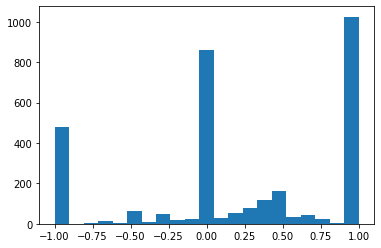

In [115]:
import matplotlib.pyplot as plt

plt.hist(user_pred['Prediction'], bins=21)

#### State Margins

In [145]:
def relabel(l):
    if l>0:
        return 1
    else:
        return -1

In [146]:
y_df1 = pd.get_dummies(user_pred['Prediction'].apply(relabel))
y_df1['state'] = user_pred['state']

In [147]:
(y_df1.groupby('state').mean()[1] - 0.5) * 100

state
Michigan       -0.795229
Pennsylvania    1.730648
Wisconsin       2.342159
Name: 1, dtype: float64